

**Project Summary.**

Trip duration is the most fundamental measure in all modes of transportation. Hence, it is crucial to predict the trip-time precisely for the advancement of Intelligent Transport Systems (ITS) and traveller information systems. In order to predict the trip duration, data mining techniques are employed in this project to predict the trip duration of rental bikes in Seoul Bike sharing system. The prediction is carried out with the combination of Seoul Bike data and weather data.

***By Using the Seoul Bike dataset, we will try to answer the following questions***

-What are the factors that influence the number of bikes rented?

-Explore the data for outliers and missing values.

-Plot the correlation between the variables and state your comments

-Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.

-Coment on Model performance by using approapriate diagnostics and measures.

In [49]:
#Importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white',color_codes=True)

In [50]:
#Loading Data
Bikes_df=pd.read_csv("/content/SeoulBikeData.csv")

In [51]:
print(Bikes_df.shape)

(8760, 14)


In [52]:

print(Bikes_df.head())

         Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]


In [53]:
Bikes_df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [54]:
Bikes_df.shape

(8760, 14)

## Factores influencing total bikes rented

In [55]:
Bikes_df.columns.values

array(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)',
       'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature(C)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day'], dtype=object)

Minorly or Majorly, the above values are the factors that influence our Target Variable- Rented Bike Count (RBC).

Missing Values

In [56]:
Bikes_df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

**There are no missing values**

In [57]:
from datetime import datetime
Bikes_df.Date=pd.to_datetime(Bikes_df.Date )
Bikes_df.info()
Bikes_df['Month']=pd.DatetimeIndex(Bikes_df['Date']).month
Bikes_df['Year']=pd.DatetimeIndex(Bikes_df['Date']).year
Bikes_df['tday']=pd.DatetimeIndex(Bikes_df['Date']).day
Bikes_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      8760 non-null   datetime64[ns]
 1   Rented Bike Count         8760 non-null   int64         
 2   Hour                      8760 non-null   int64         
 3   Temperature(C)            8760 non-null   float64       
 4   Humidity(%)               8760 non-null   int64         
 5   Wind speed (m/s)          8760 non-null   float64       
 6   Visibility (10m)          8760 non-null   int64         
 7   Dew point temperature(C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)   8760 non-null   float64       
 9   Rainfall(mm)              8760 non-null   float64       
 10  Snowfall (cm)             8760 non-null   float64       
 11  Seasons                   8760 non-null   object        
 12  Holiday             

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


In [58]:
Bikes_df.dtypes

Date                        datetime64[ns]
Rented Bike Count                    int64
Hour                                 int64
Temperature(C)                     float64
Humidity(%)                          int64
Wind speed (m/s)                   float64
Visibility (10m)                     int64
Dew point temperature(C)           float64
Solar Radiation (MJ/m2)            float64
Rainfall(mm)                       float64
Snowfall (cm)                      float64
Seasons                             object
Holiday                             object
Functioning Day                     object
Month                                int64
Year                                 int64
tday                                 int64
dtype: object

**Outliers**

<function matplotlib.pyplot.show>

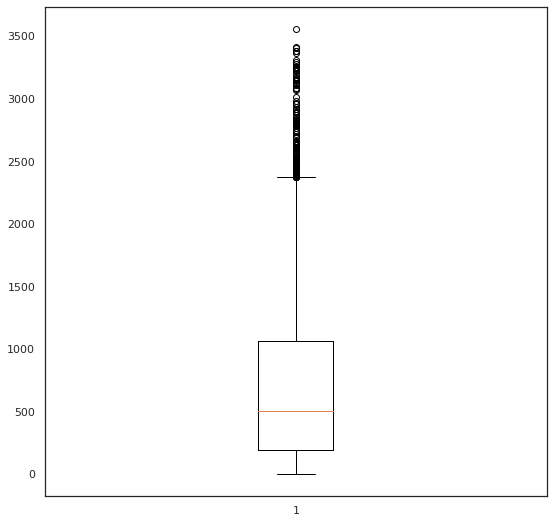

In [59]:
plt.figure(figsize=(9,9))
plt.boxplot(Bikes_df['Rented Bike Count'])
plt.show

In [60]:
Bikes_categorical=Bikes_df.select_dtypes(include='object')

In [61]:
Bikes_categorical.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


**WE WILL GET DUMMIES FOR CATEGORICAL VARIABLES**

In [62]:
Bikes_categorical2=Bikes_df
for cols in Bikes_categorical:
  dummies =pd.get_dummies(Bikes_df[cols],drop_first=True)
  Bikes_categorical2 = pd.concat([Bikes_categorical2,dummies],axis='columns')

**Categorical Values**

In [63]:
Bikes_categorical2.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,tday,Spring,Summer,Winter,No Holiday,Yes
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12,0,0,1,1,1


**Outlier analysis:**

FOR THE COLUMNS HAVING OUTLIERS, WE WILL REMOVE THEM AND CONSIDER ONLY THOSE VALUES WHICH LIE BETWEEN 25TH PERCENTILE AND 75 PERCENTILE.

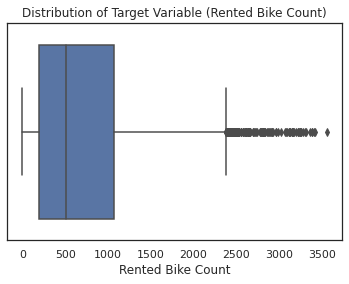

In [64]:

sns.boxplot(Bikes_categorical2['Rented Bike Count'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

**Removing the outliers**

In [65]:

Q1 = np.percentile(Bikes_categorical2['Rented Bike Count'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_categorical2['Rented Bike Count'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_categorical2['Rented Bike Count'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim) 

low limit: -1120.75
upper limit: 2377.25


In [66]:
Bikes_categorical2.rename(columns = {'Rented Bike Count':'RBC'}, inplace = True)

In [67]:
Bikes_df2 = Bikes_categorical2[Bikes_categorical2.RBC< up_lim]
Bikes_df2=Bikes_df2[Bikes_df2.RBC> low_lim]


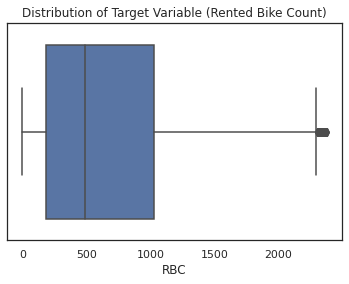

In [68]:
sns.boxplot(Bikes_df2['RBC'])
plt.title('Distribution of Target Variable (Rented Bike Count)')
plt.show()

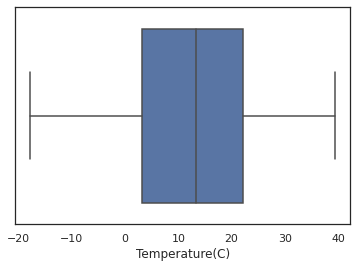

In [69]:
sns.boxplot(Bikes_df2['Temperature(C)'])

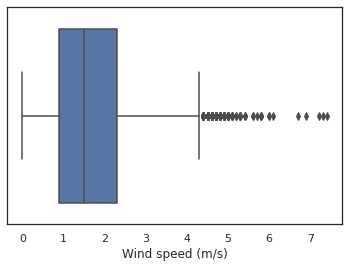

In [70]:
sns.boxplot(Bikes_df2['Wind speed (m/s)'])

In [71]:
Bikes_df2.rename(columns = {'Wind speed (m/s)':'WS'}, inplace = True)

In [72]:
Q1 = np.percentile(Bikes_df2['WS'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_df2['WS'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_df2['WS'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.1999999999999997
upper limit: 4.3999999999999995


In [73]:
Bikes_df2=Bikes_df2[Bikes_df2.WS<up_lim]
Bikes_df2=Bikes_df2[Bikes_df2.WS>low_lim]

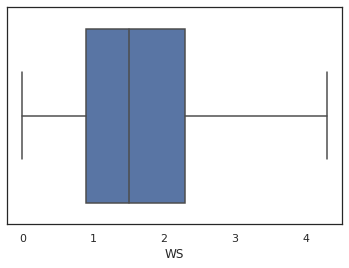

In [74]:
sns.boxplot(Bikes_df2.WS)

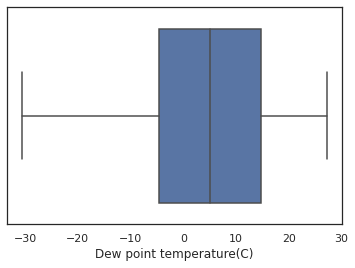

In [75]:
sns.boxplot(Bikes_df2['Dew point temperature(C)'])

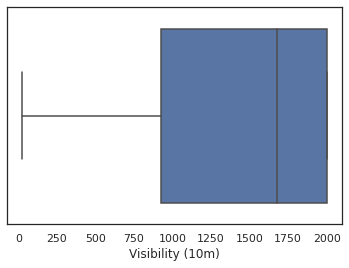

In [76]:
sns.boxplot(Bikes_df2['Visibility (10m)'])

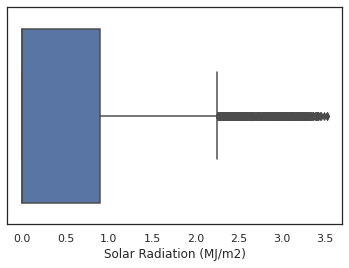

In [77]:
sns.boxplot(Bikes_df2['Solar Radiation (MJ/m2)'])

In [78]:
Bikes_df2.rename(columns = {'Solar Radiation (MJ/m2)':'SR'}, inplace = True)

In [79]:
Q1 = np.percentile(Bikes_df2['SR'], 25, interpolation = 'midpoint')  
Q2 = np.percentile(Bikes_df2['SR'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(Bikes_df2['SR'], 75, interpolation = 'midpoint')     
IQR = Q3 - Q1 
low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR
print('low limit:', low_lim) 
print('upper limit:', up_lim)

low limit: -1.35
upper limit: 2.25


In [80]:
Bikes_df2 = Bikes_df2[Bikes_df2.SR< up_lim]
Bikes_df2 = Bikes_df2[Bikes_df2.SR>low_lim]

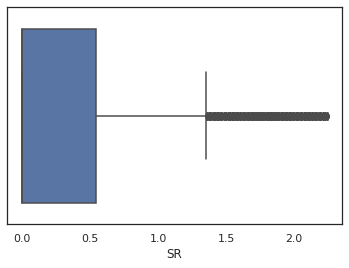

In [81]:
sns.boxplot(Bikes_df2.SR)

In [82]:
Bikes_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 8759
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      7752 non-null   datetime64[ns]
 1   RBC                       7752 non-null   int64         
 2   Hour                      7752 non-null   int64         
 3   Temperature(C)            7752 non-null   float64       
 4   Humidity(%)               7752 non-null   int64         
 5   WS                        7752 non-null   float64       
 6   Visibility (10m)          7752 non-null   int64         
 7   Dew point temperature(C)  7752 non-null   float64       
 8   SR                        7752 non-null   float64       
 9   Rainfall(mm)              7752 non-null   float64       
 10  Snowfall (cm)             7752 non-null   float64       
 11  Seasons                   7752 non-null   object        
 12  Holiday             

## Correlation

In [100]:
data_corr=Bikes_df2.corr()
data_corr=data_corr['RBC'][1:]
data_corr[abs(data_corr)>=0.0].sort_values(ascending=False)

Temperature(C)              0.533168
Hour                        0.400517
Dew point temperature(C)    0.381486
Summer                      0.300130
SR                          0.248899
Year                        0.210914
Yes                         0.203973
Visibility (10m)            0.188051
WS                          0.106349
Month                       0.085771
No Holiday                  0.070541
tday                        0.047612
Spring                      0.013486
Rainfall(mm)               -0.125173
Snowfall (cm)              -0.140926
Humidity(%)                -0.162957
Winter                     -0.420918
Name: RBC, dtype: float64

Temperature, Hour, Dew Point Temperature and Summer season have significant amount of correlations with RBC

In [84]:
Bikes_categorical2=Bikes_df2

**Correlation between Variables**

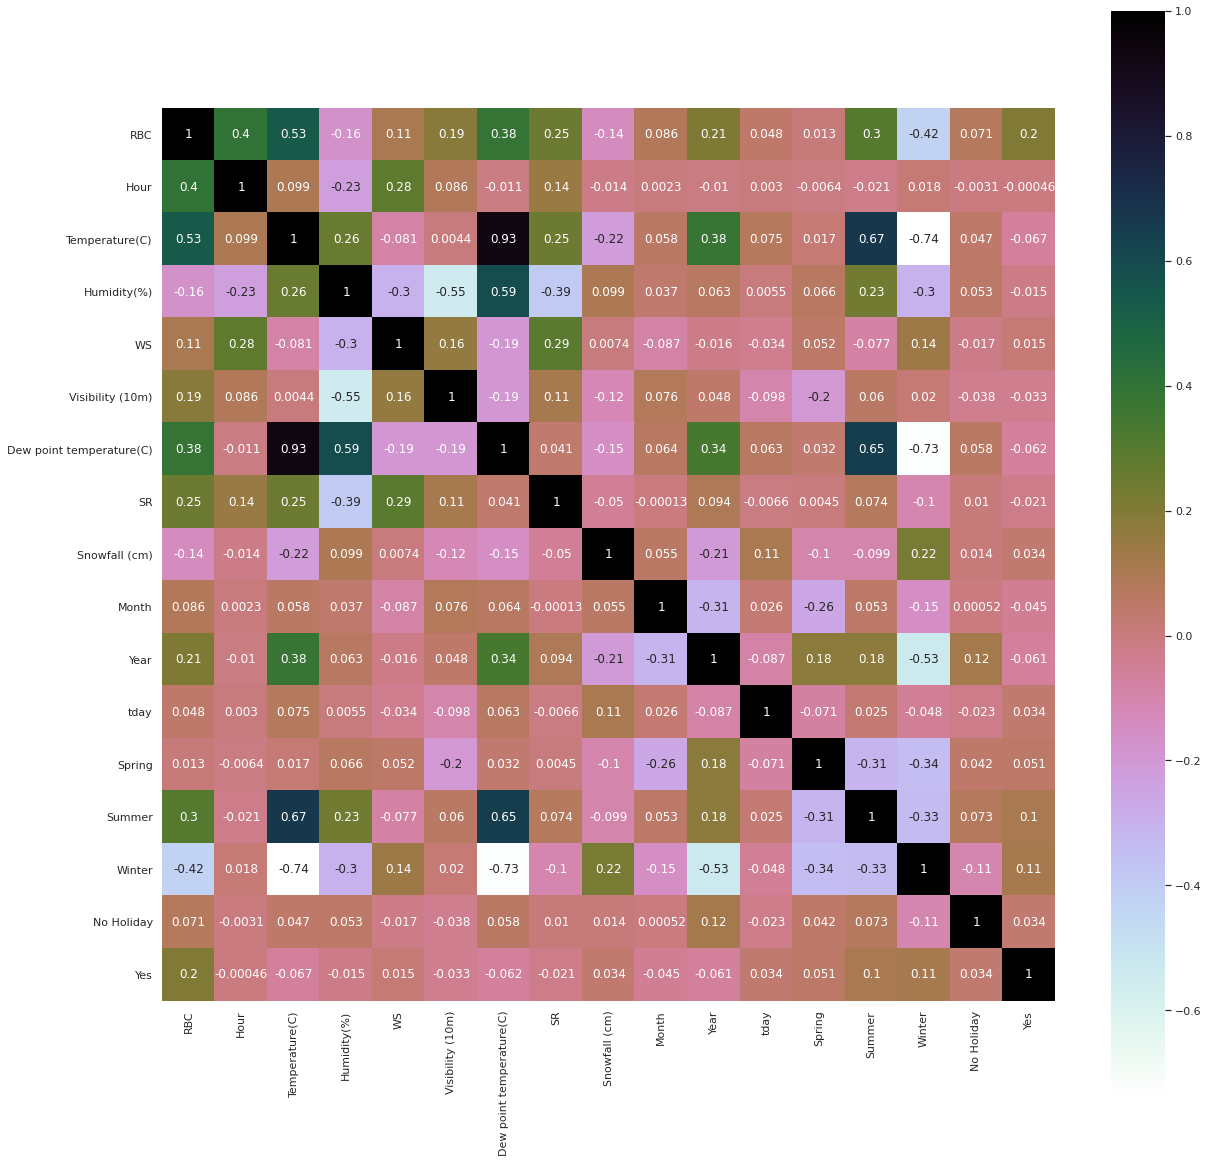

In [97]:

corr=Bikes_categorical2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='cubehelix_r',square=True)

In [86]:
print(Bikes_categorical2.shape)
print(Bikes_categorical2.columns.values)


(7752, 22)
['Date' 'RBC' 'Hour' 'Temperature(C)' 'Humidity(%)' 'WS'
 'Visibility (10m)' 'Dew point temperature(C)' 'SR' 'Rainfall(mm)'
 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day' 'Month' 'Year'
 'tday' 'Spring' 'Summer' 'Winter' 'No Holiday' 'Yes']


In [87]:
Bikes_categorical2=Bikes_categorical2.drop(['Date','Seasons','Holiday','Functioning Day','Rainfall(mm)'],axis=1)

In [88]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(Bikes_categorical2)
#from sklearn.preprocessing import normalize
#normalize(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [89]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(Bikes_categorical2, test_size=0.25)


In [90]:
trainx=train.drop(['RBC'],axis=1)
trainy=train['RBC']

val_x=val.drop(['RBC'],axis=1)
val_y=val['RBC']

In [91]:
print(trainy.shape)
print(trainx.shape)
print(val_y.shape)
print(val_x.shape)
test=Bikes_df[6570:]

(5814,)
(5814, 16)
(1938,)
(1938, 16)


In [92]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(trainx,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
df_pred=lr.predict(val_x)


In [94]:

print("The model's metrics values are: ")
print("Accuracy: ", lr.score(val_x,val_y))
print("Mean Absolute Error: ",mean_absolute_error(df_pred , val_y))
print("Mean Squared Error: " ,mean_squared_error(df_pred,val_y))
print("R-squared score: ", r2_score(val_y,df_pred))

The model's metrics values are: 
Accuracy:  0.5469488343018927
Mean Absolute Error:  307.68266608086054
Mean Squared Error:  164524.28999980475
R-squared score:  0.5469488343018927


**Model Performance -> R-squared score is 0.54 i.e 54%**

---



---


**Also we used 16 Independent Variables for our Linear regression model**

In [101]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge
ridge.fit(trainx,trainy)
rp=ridge.predict(val_x)
ridge_score = ridge.score(val_x,val_y)

ridge.coef_
print("Ridge:")
print("R-square score:", r2_score(rp,val_y))
print("Training score",ridge_score)



Ridge:
R-square score: 0.13247470955464835
Training score 0.5469028629551969


In [102]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso
lasso.fit(trainx,trainy)
lp=lasso.predict(val_x)
lasso_score = lasso.score(val_x,val_y)
lasso.coef_
print("Lasso:")
print("R-squared score:",r2_score(lp,val_y))
print("Training score",lasso_score)


Lasso:
R-squared score: 0.1147453376236155
Training score 0.5461796359882416
